# Exploratory Data Analysis (EDA): Used Car Listings
This notebook explores a dataset of used car listings to understand key trends and prepare the data for visualization. We'll look at missing values, clean the data, and visualize distributions of important features.


In [8]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../vehicles_us.csv')  # Use ../ if you're in the notebooks folder
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [9]:
df.duplicated().sum()

np.int64(0)

There are no duplicates.

In [10]:
df['is_4wd'] = df['is_4wd'].fillna(0)
df['paint_color'] = df['paint_color'].fillna('Unknown')
df['model_year'] = df['model_year'].fillna(df.groupby('model')['model_year'].transform('median'))
df['odometer'] = df['odometer'].fillna(df.groupby('model')['odometer'].transform('median'))
df['cylinders'] = df['cylinders'].fillna(df.groupby('model')['cylinders'].transform('median'))


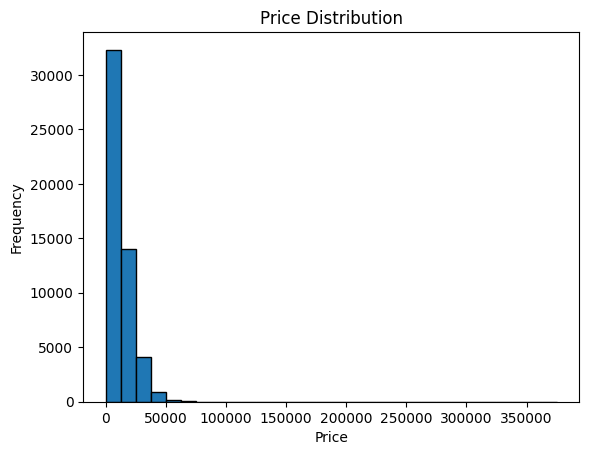

In [11]:
df['price'].plot(kind='hist', bins=30, edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

📝 Price Distribution - Summary
The histogram shows that most used cars are priced below $20,000, with a sharp drop in frequency as prices increase. The distribution is right-skewed, meaning a few listings have very high prices (outliers) that pull the tail far to the right — likely luxury or rare vehicles.

This insight is important because:

It highlights affordable car listings dominate the dataset.

You may consider removing extreme price outliers for better modeling or visual clarity.